In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as time
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_excel('projectData.xlsx','Training Dataset')

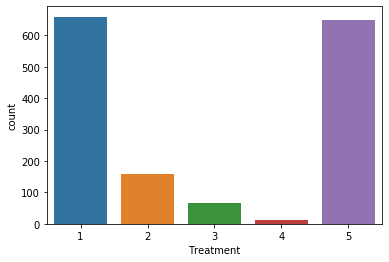

In [3]:
arr=data['Treatment']
sns.countplot(arr)

In [4]:
columns = data.columns


In [5]:
missing_percentage=[]
n=len(data)
columns_with_na=[]
columns_to_keep_with_na=[]
columns_to_drop=[]
new=[]

for c in range(0,len(columns),1):
    column=columns[c]
    missing_values=(data[column].isnull().sum())
    if(missing_values>0):
        columns_with_na.append(column)
        t=(missing_values/n)*100
        missing_percentage.append(t)
        if(t>45):
            columns_to_drop.append(column)
        elif(20<=t<=45):
            new.append(column)
        else:
            columns_to_keep_with_na.append(column)

Text(0, 0.5, 'Missing Percentages')

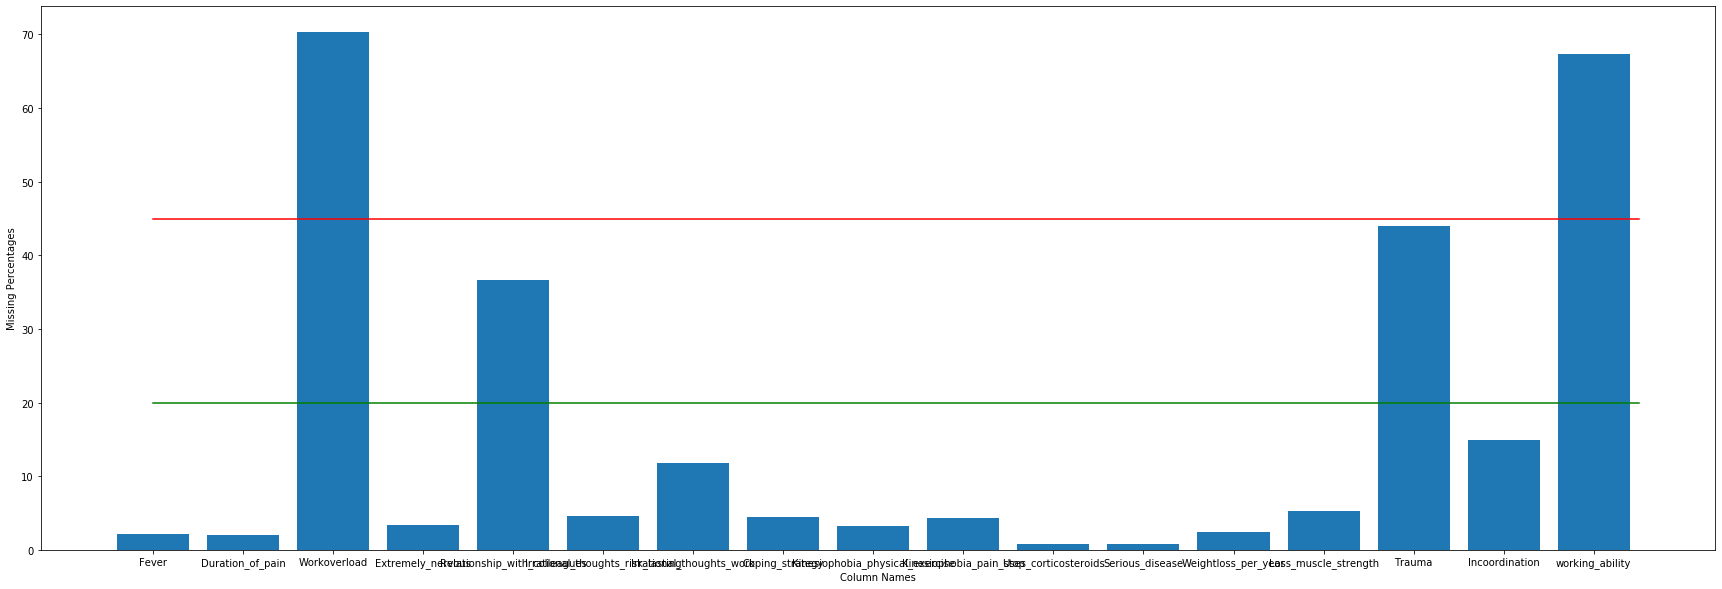

In [6]:
plt.figure(figsize=(30,10))
plt.bar(columns_with_na,missing_percentage)
y=[45]*50
z=[20]*50
plt.plot(np.linspace(0,16.5),y,color='red')
plt.plot(np.linspace(0,16.5),z,color='green')
plt.xlabel('Column Names')
plt.ylabel('Missing Percentages')
    
    
    

In [7]:
for column in columns_to_drop:
    data.drop((column),inplace=True,axis=1)
    print("'",column,"'","is dropped.")

' Workoverload ' is dropped.
' working_ability ' is dropped.


In [8]:
# print(columns_to_keep_with_na)
# ['Fever', 'Duration_of_pain', 'Extremely_nervous', 
#  'Irrational_thoughts_risk_lasting', 'Irrational_thoughts_work', 'Coping_strategy', 
#  'Kinesiophobia_physical_exercise', 'Kinesiophobia_pain_stop', 'Uses_corticosteroids', 
#  'Serious_disease', 'Weightloss_per_year', 'Loss_muscle_strength','Incoordination']

mode_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for column in columns_to_keep_with_na:
    data[column]=mode_imputer.fit_transform(np.asarray(data[column]).reshape(-1,1))



In [9]:
print((data.isnull().sum()),"ssssssss",data[new[0]].isnull().sum(),data[new[1]].isnull().sum())

Treatment                             0
Fever                                 0
Duration_of_pain                      0
Sick_leave                            0
Earlier_hospitalization               0
Familiy_history                       0
Depression                            0
Extremely_nervous                     0
Stress                                0
Relationship_with_colleagues        567
Irrational_thoughts_risk_lasting      0
Irrational_thoughts_work              0
Coping_strategy                       0
Kinesiophobia_physical_exercise       0
Kinesiophobia_pain_stop               0
Age                                   0
Uses_analgesics                       0
Uses_corticosteroids                  0
Serious_disease                       0
Neurogenic_signals                    0
Continuous_pain                       0
Decreased_mobility                    0
Nocturnal_pain                        0
Weightloss_per_year                   0
Loss_muscle_strength                  0


680
[[ 0  0  0  0  0  3  0  0  0  4  3]
 [ 1  0  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  1  1  0  0  0  2  0  0]
 [ 0  0  0  0  1  0  1  2  1  1  0]
 [ 0  0  0  0  1  1  0  0  1  0  0]
 [ 1  0  0  1  1  0  1  5  4  2  4]
 [ 0  0  0  0  0  2  2  2  1  4  0]
 [ 1  0  1  2  0  1  0  3  8  7  2]
 [ 3  0  0  2  3  4  5  8 11  6  4]
 [ 1  0  1  1  0  3  0  5 13  5  2]
 [ 2  1  1  3  0  2  4  5  6  7  7]]
0.14795918367346939


[Text(132.414744846613, 212.26285714285714, 'X[7] <= 0.5\ngini = 0.861\nsamples = 783\nvalue = [53, 8, 16, 23, 28, 79, 56, 88, 174, 122, 136]'),
 Text(35.16861032065519, 201.90857142857143, 'X[10] <= 1.5\ngini = 0.813\nsamples = 248\nvalue = [17, 0, 2, 6, 5, 17, 12, 20, 59, 35, 75]'),
 Text(22.563214880621878, 191.5542857142857, 'X[14] <= 5.5\ngini = 0.744\nsamples = 63\nvalue = [5, 0, 0, 1, 0, 5, 3, 3, 9, 9, 28]'),
 Text(17.613714602998336, 181.2, 'X[13] <= 9.5\ngini = 0.73\nsamples = 57\nvalue = [2, 0, 0, 1, 0, 4, 3, 3, 9, 9, 26]'),
 Text(12.17623542476402, 170.84571428571428, 'X[26] <= 3.5\ngini = 0.79\nsamples = 40\nvalue = [2, 0, 0, 1, 0, 3, 2, 3, 7, 8, 14]'),
 Text(11.432648528595225, 160.49142857142857, 'X[30] <= 2.0\ngini = 0.82\nsamples = 35\nvalue = [2, 0, 0, 1, 0, 3, 2, 3, 7, 8, 9]'),
 Text(5.762798445308162, 150.13714285714286, 'X[31] <= 0.5\ngini = 0.812\nsamples = 24\nvalue = [2, 0, 0, 1, 0, 2, 2, 1, 6, 7, 3]'),
 Text(2.602554136590783, 139.78285714285715, 'X[11] <= 2.5\n

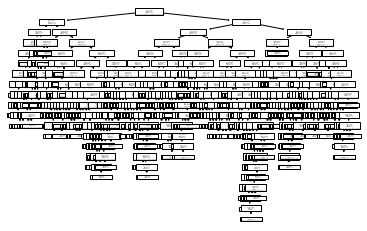

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
import sklearn.tree as tree
print(data['Trauma'].isnull().sum())
newData=data.drop(('Trauma'),inplace=False,axis=1)

encoder = OrdinalEncoder()
newData['Age'] = encoder.fit_transform(X=np.asarray(newData['Age']).reshape(-1,1),y=None)
predictPoints=newData[newData.isnull().any(axis=1)]
newData.dropna(axis=0,inplace=True)
labels=newData['Relationship_with_colleagues']
newData=newData.drop(('Relationship_with_colleagues'),inplace=False,axis=1)

newData=newData.to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(newData, labels, test_size=0.20)
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)
acc=accuracy_score(ytest,pred)
print(confusion_matrix(ytest,pred))
print(acc)
tree.plot_tree(clf)

In [15]:
print(acc)

0.14795918367346939


In [16]:
predictPoints.drop(('Relationship_with_colleagues'),inplace=True,axis=1)
newValues=clf.predict(predictPoints)
print(data['Trauma'].isnull().sum())

680


In [17]:
values=np.concatenate((labels,newValues),axis=0)


In [18]:
data['Relationship_with_colleagues'] = values
print(data['Trauma'].isnull().sum())

680


680
680
680
[[99 23]
 [26 26]]
0.7183908045977011


[Text(207.59472440036902, 210.645, 'X[1] <= 0.5\ngini = 0.407\nsamples = 692\nvalue = [495, 197]'),
 Text(135.55886761992622, 197.055, 'X[27] <= 6.5\ngini = 0.491\nsamples = 364\nvalue = [206, 158]'),
 Text(59.86017066420665, 183.465, 'X[4] <= 0.5\ngini = 0.472\nsamples = 311\nvalue = [192, 119]'),
 Text(23.164206642066425, 169.875, 'X[21] <= 52.5\ngini = 0.499\nsamples = 93\nvalue = [45, 48]'),
 Text(14.516236162361626, 156.285, 'X[29] <= 2.5\ngini = 0.493\nsamples = 82\nvalue = [36, 46]'),
 Text(9.574538745387455, 142.695, 'X[13] <= 1.0\ngini = 0.48\nsamples = 75\nvalue = [30, 45]'),
 Text(7.10369003690037, 129.10500000000002, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(12.04538745387454, 129.10500000000002, 'X[11] <= 1.5\ngini = 0.469\nsamples = 72\nvalue = [27, 45]'),
 Text(9.574538745387455, 115.515, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(14.516236162361626, 115.515, 'X[11] <= 4.5\ngini = 0.49\nsamples = 63\nvalue = [27, 36]'),
 Text(4.94169741697417, 101.925, 'X[

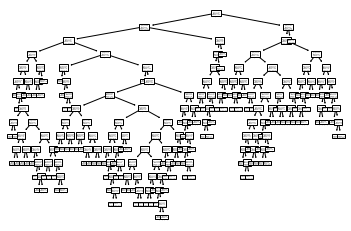

In [19]:
newData=data
print(data['Trauma'].isnull().sum())
print(newData['Trauma'].isnull().sum())
newData['Age'] = encoder.fit_transform(X=np.asarray(newData['Age']).reshape(-1,1),y=None)
predictPoints=newData[newData.isnull().any(axis=1)]
print (len(predictPoints))
newData=newData.dropna(axis=0,inplace=False)
labels=newData['Trauma']
newData=newData.drop(('Trauma'),inplace=False,axis=1)


xtrain, xtest, ytrain, ytest = train_test_split(newData, labels, test_size=0.20)
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)
acc=accuracy_score(ytest,pred)
print(confusion_matrix(ytest,pred))
print(acc)
tree.plot_tree(clf)

In [ ]:
predictPoints=predictPoints.drop(('Trauma'),inplace=False,axis=1)
newValues=clf.predict(predictPoints)
values=np.concatenate((labels,newValues),axis=0)
data['Trauma'] = values

In [ ]:
print(data.isnull().sum())